In [1]:
from qiskit import *
from qiskit.visualization import *

In [98]:
def qram():
    qc = QuantumCircuit(11)
    
    # Address 00
    # Apply X gate to qubits with 0 value
    qc.x([0, 1])
    qc.ccx(0, 1, 2)
    qc.ccx(0, 1, 3)
    qc.ccx(0, 1, 4)
    qc.ccx(0, 1, 8)
    qc.x([0, 1])

    # Address 01
    qc.x(0)
    qc.ccx(0, 1, 2)
    qc.ccx(0, 1, 4)
    qc.ccx(0, 1, 8)
    qc.ccx(0, 1, 9)
    qc.x(0)

    # Address 10
    qc.x(1)
    qc.ccx(0, 1, 2)
    qc.ccx(0, 1, 4)
    qc.ccx(0, 1, 5)
    qc.ccx(0, 1, 6)
    qc.ccx(0, 1, 7)
    qc.ccx(0, 1, 10)
    qc.x(1)

    # Address 11
    qc.ccx(0, 1, 2)
    qc.ccx(0, 1, 8)
    
    qram_gate = qc.to_gate()
    qram_gate.name = 'qRAM'
    
    return qram_gate

In [99]:
def flip_adjacent(qc):
#     flip_dict = {0: [0, 1, 3], 1: [0, 1, 2, 4], 2: [1, 2, 5], 3: [0, 3, 4, 6], 4: [1, 3, 4, 5, 7], 5: [2, 4, 5, 8], 6: [3, 6, 7], 7: [4, 6, 7, 8], 8: [5, 7, 8]}

    qc.cx(11, 2)
    qc.cx(11, 3)
    qc.cx(11, 5)
    
    qc.cx(12, 2)
    qc.cx(12, 3)
    qc.cx(12, 4)
    qc.cx(12, 6)
    
    qc.cx(13, 3)
    qc.cx(13, 4)
    qc.cx(13, 7)
    
    qc.cx(14, 2)
    qc.cx(14, 5)
    qc.cx(14, 6)
    qc.cx(14, 8)
    
    qc.cx(15, 3)
    qc.cx(15, 5)
    qc.cx(15, 6)
    qc.cx(15, 7)
    qc.cx(15, 9)
    
    qc.cx(16, 4)
    qc.cx(16, 6)
    qc.cx(16, 7)
    qc.cx(16, 10)
    
    qc.cx(17, 5)
    qc.cx(17, 8)
    qc.cx(17, 9)
    
    qc.cx(18, 6)
    qc.cx(18, 8)
    qc.cx(18, 9)
    qc.cx(18, 10)
    
    qc.cx(19, 7)
    qc.cx(19, 9)
    qc.cx(19, 10)

In [113]:
def oracle():
    qc = QuantumCircuit(20)
    
    # Oracle
    qc.h(range(11, 20))

    flip_adjacent(qc)

    qc.x(range(2, 11))

    control_qubits = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    qc.mct(control_qubits, 19)

    qc.x(range(2, 11))

    flip_adjacent(qc)
    
    oracle_gate = qc.to_gate()
    oracle_gate.name = 'Oracle'
    
    return oracle_gate

In [116]:
def diffuser():
    qc = QuantumCircuit(2)
    
    qc.x(range(2))
    qc.cx(0, 1)
    qc.x(range(2))
    
    diffuser_gate = qc.to_gate()
    diffuser_gate.name = 'Diffuser'
    
    return diffuser_gate

In [157]:
def main():
#     address = QuantumRegister(2)

#     # n+n+1 for including lights_output and ancilla
#     data = QuantumRegister(19)    # For data values upto 2**n, where n is 3. E.g storing number 8.
#     # lights = QuantumCircuit(9)
#     cr = ClassicalRegister(11)

#     qc = QuantumCircuit(address, data, cr)

    qc = QuantumCircuit(20, 12)
    
    # Prepare Addresses. 
    # Use Hadamard for superposition of 2 address qubits into 4 addresses.
    qc.h([0, 1])
    
    # qRAM
    qram_gate = qram()
    qc.append(qram_gate, range(11))
    
    # Oracle
    oracle_gate = oracle()
    qc.append(oracle_gate, range(20))
    
    # qRAM
    qram_gate = qram()
    qc.append(qram_gate, range(11))
    
    # Diffuser
    diffuser_gate = diffuser()
    qc.append(diffuser_gate, range(2))
    
    # Measure
    qc.barrier()
    qc.measure([10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0], range(11))
      
    return qc

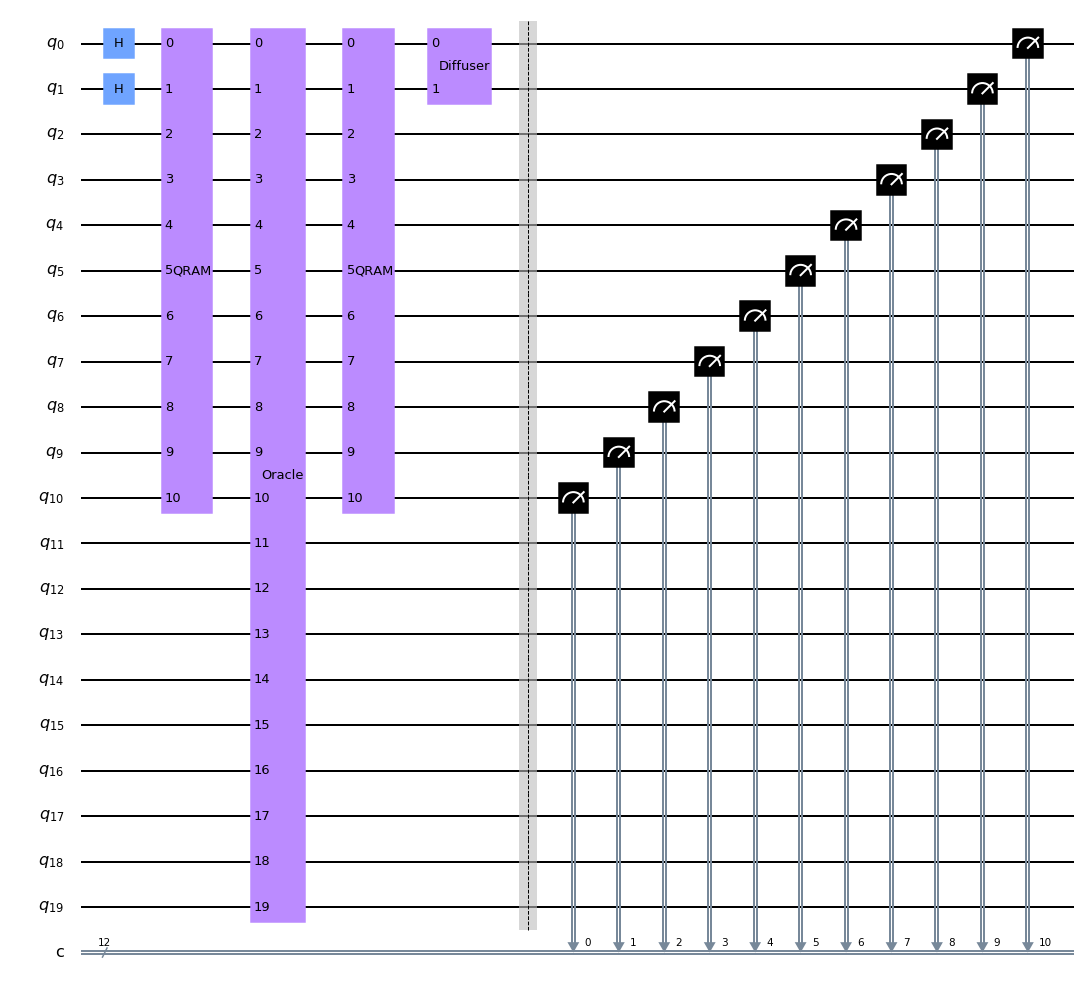

In [158]:
qc = main()
qc.draw('mpl')

{'000000000000': 2025, '001000000000': 2082, '001000001011': 3, '010000000000': 1960, '010000001011': 3, '011000000000': 2109, '011000001011': 4, '000000001011': 6}


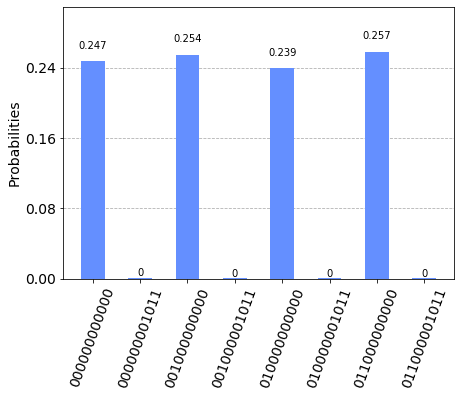

In [159]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots = 8192).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

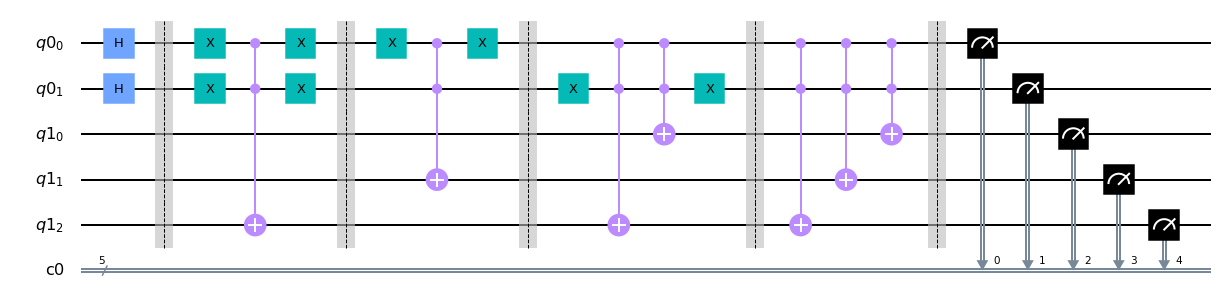

In [2]:
# Sample
address = QuantumRegister(2)
data = QuantumRegister(3)
c = ClassicalRegister(5)
qc = QuantumCircuit(address,data,c)

# address preparation
qc.h([address[0],address[1]])
qc.barrier()
# address 0 -> data = 1
qc.x([address[0],address[1]])
qc.ccx(address[0],address[1],data[2])    # Create 1 using 3 qubits (001)
qc.x([address[0],address[1]])
qc.barrier()
# address 1 -> data = 2
qc.x(address[0])
qc.ccx(address[0],address[1],data[1])    # Create 2 using 3 qubits (010)
qc.x(address[0])
qc.barrier()
# address 2 -> data = 5
qc.x(address[1])
qc.ccx(address[0],address[1],data[2])    # Create 5 using 3 qubits (101)
qc.ccx(address[0],address[1],data[0])
qc.x(address[1])
qc.barrier()
# address 3 -> data = 7
qc.ccx(address[0],address[1],data[2])    # Create 1 using 3 qubits (111)
qc.ccx(address[0],address[1],data[1])
qc.ccx(address[0],address[1],data[0])
qc.barrier()


#Check the qRAM　status
qc.measure(address[0:2], c[0:2])
qc.measure(data[0:3], c[2:5])

qc.draw('mpl')

# Reverse the output string.
# qc = qc.reverse_bits()

{'10000': 2081, '10101': 2104, '11111': 2016, '01010': 1991}


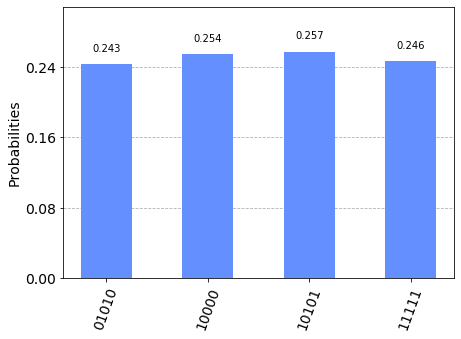

In [3]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots = 8192).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)